In [1]:
import time
from snowflake.snowpark.session import Session
import configparser
 
import warnings
warnings.filterwarnings("ignore")
 
config = configparser.ConfigParser()
config.read("snowflake_connection.ini")
 
connection_parameters = {
    "user": f'{config["Snowflake"]["user"]}',
    "password": f'{config["Snowflake"]["password"]}',
    "account": f'{config["Snowflake"]["account"]}',
    "WAREHOUSE": f'{config["Snowflake"]["WAREHOUSE"]}',
    "DATABASE": f'{config["Snowflake"]["DATABASE"]}',
    "SCHEMA": f'{config["Snowflake"]["SCHEMA"]}'
}
 
def snowflake_connector(conn):
    try:
        session = Session.builder.configs(conn).create()
        print("connection successful!")
    except:
        raise ValueError("error while connecting with db")
    return session
 
session = snowflake_connector(connection_parameters)

connection successful!


In [2]:
df = session.table("CPG_DATA_ORIGINAL").to_pandas()
df_test = session.table("CPG_DATA_ORIGINAL").to_pandas()

In [3]:
df.head()

,Date,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,2023-01-01,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91.0,29.0,NaN,13,0.0,A,5.0,15.0,17115.0
1,2023-01-01,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210.0,31.0,NaN,4,0.0,A,3.0,17.0,5074.0
2,2023-01-01,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161.0,37.0,NaN,17,0.0,A,6.0,22.0,23137.0
3,2023-01-01,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103.0,21.0,NaN,17,1.0,A+,3.0,27.0,22115.0
4,2023-01-01,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112.0,25.0,2009.0,18,0.0,C,6.0,24.0,24071.0


In [7]:
!pip install -U scikit-learn

     |████████████████████████████████| 11.1MB 3.8MB/s eta 0:00:01
     |████████████████████████████████| 34.5MB 75.0MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 62.0MB/s eta 0:00:01
     |████████████████████████████████| 307kB 70.4MB/s eta 0:00:01
ERROR: mlflow 2.10.0 has requirement pytz<2024, but you'll have pytz 2024.1 which is incompatible.
ERROR: fosforio 1.0.1 has requirement pandas==2.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement pandas<2,>=1.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement snowflake-snowpark-python<2,>=1.4.0, but you'll have snowflake-snowpark-python 1.0.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement xgboost<2,>=1.7.3, but you'll have xgboost 2.0.3 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement Flask==2.1.1; python_version >= "3.7", but you'll have flask 3.0.3 which is incomp

In [4]:
import pandas as pd
import numpy as np

#import matplotlib.pyplot as plt
#%matplotlib inline



from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
import warnings
warnings.simplefilter(action='ignore')

In [5]:
# train dataset
#df = pd.read_csv("3.FMCG_data_location_changed.csv")

# test dataset
#df_test = pd.read_csv("3.FMCG_data_location_changed.csv")

In [6]:
df

,Date,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
0,2023-01-01,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91.0,29.0,NaN,13,0.0,A,5.0,15.0,17115.0
1,2023-01-01,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210.0,31.0,NaN,4,0.0,A,3.0,17.0,5074.0
2,2023-01-01,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161.0,37.0,NaN,17,0.0,A,6.0,22.0,23137.0
3,2023-01-01,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103.0,21.0,NaN,17,1.0,A+,3.0,27.0,22115.0
4,2023-01-01,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112.0,25.0,2009.0,18,0.0,C,6.0,24.0,24071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349996,2024-02-01,WH_124996,EID_74996,Rural,Mid,West,Zone 2,4,7,1,...,1,130.0,39.0,2005.0,23,0.0,B,21.0,36.0,37853.0
349997,2024-02-01,WH_124997,EID_74997,Urban,Large,South,Zone 5,12,4,0,...,1,147.0,27.0,2012.0,12,1.0,A,30.0,55.0,65888.0
349998,2024-02-01,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,4,10,...,1,60.0,44.0,NaN,24,0.0,B,17.0,38.0,38534.0
349999,2024-02-01,WH_124999,EID_74999,Rural,Mid,West,Zone 4,3,3,4,...,1,239.0,57.0,NaN,22,0.0,B+,16.0,41.0,58351.0


In [7]:
df.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
storage_issue_reported             73
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
Date                               14
approved_wh_govt_certificate        7
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [8]:
df.drop(columns=['Ware_house_ID','WH_Manager_ID','Date'], inplace = True)
df['workers_num'].median()
df['approved_wh_govt_certificate'].mode()
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)
df.isnull().sum()
df.nunique().sort_values(ascending= True)

Location_type                       2
temp_reg_mach                       2
electric_supply                     2
flood_proof                         2
Warehouse_Ownership                 2
flood_impacted                      2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
approved_wh_govt_certificate        7
No_of_Competitor                   23
transport_issue                    23
Refill_Requests                    27
wh_est_year                        28
wh_breakdown                       47
govt_check                         70
storage_issue_reported             73
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [9]:
for i in df.columns[df.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df[i].unique()))
    print(df[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    321398
Urban     28603
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

In [10]:
def count_outliers(df):
    outliers={}
    for i in df.columns:
        if pd.api.types.is_numeric_dtype(df[i]):
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5*iqr
            upper = q3 + 1.5*iqr
            outliers[i] = df[(df[i] < lower) | (df[i] > upper)].shape[0]
        else:
            pass
    return outliers

In [11]:
outlier_counts = count_outliers(df)
outlier_counts

{'Refill_Requests': 4159,
 'transport_issue': 3852,
 'No_of_Competitor': 16980,
 'No_of_retailers': 7980,
 'Number_of_distributors': 494,
 'flood_impacted': 34356,
 'flood_proof': 19125,
 'electric_supply': 0,
 'dist_from_hub': 0,
 'workers_num': 8332,
 'wh_est_year': 0,
 'storage_issue_reported': 932,
 'temp_reg_mach': 0,
 'wh_breakdown': 436,
 'govt_check': 114,
 'product_wg_ton': 1327}

In [12]:
df['product_wg_ton'].corr(df['flood_proof'])
df['product_wg_ton'].corr(df['flood_impacted'])
df.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [13]:
def remove_outliers(df):
    num_df = df.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df.loc[df_no_outliers.index]

In [14]:
df = remove_outliers(df)
df.shape

(173446, 20)

In [15]:
df_test.nunique().sort_values(ascending=False)

product_wg_ton                  65179
WH_Manager_ID                   25000
Ware_house_ID                   25000
No_of_retailers                  9068
dist_from_hub                     217
Number_of_distributors            138
workers_num                       122
storage_issue_reported             73
govt_check                         70
wh_breakdown                       47
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
Date                               14
approved_wh_govt_certificate        7
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
flood_proof                         2
flood_impacted                      2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [16]:
df_test.drop(columns=['Ware_house_ID', 'WH_Manager_ID'], inplace = True)
print(len(df_test[df_test.duplicated]))

0


In [17]:
# print percentage of null values in each column

null_values_features = [i for i in df_test.columns if df_test[i].isnull().sum()>1]
for i in null_values_features:
    print(i, np.round(df_test[i].isnull().mean()*100, 2), "% missing values")

workers_num 0.28 % missing values
wh_est_year 47.52 % missing values


In [18]:
df_test.drop(columns=['wh_est_year'], inplace = True)
df_test['workers_num'].median()
df_test['workers_num'].fillna(df_test['workers_num'].median(), inplace=True)
df_test['approved_wh_govt_certificate'].mode()
df_test['approved_wh_govt_certificate'].fillna(df_test['approved_wh_govt_certificate'].mode()[0], inplace=True)
df_test.isnull().sum()
df_test.nunique().sort_values(ascending= True)

temp_reg_mach                       2
Location_type                       2
electric_supply                     2
flood_proof                         2
flood_impacted                      2
Warehouse_Ownership                 2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
approved_wh_govt_certificate        7
Date                               14
No_of_Competitor                   23
transport_issue                    23
Refill_Requests                    27
wh_breakdown                       47
govt_check                         70
storage_issue_reported             73
workers_num                       122
Number_of_distributors            138
dist_from_hub                     217
No_of_retailers                  9068
product_wg_ton                  65179
dtype: int64

In [19]:
for i in df_test.columns[df_test.nunique()<=4]:
    print("Number of unique values in column ", i, ' :', len(df_test[i].unique()))
    print(df_test[i].value_counts())
    print(' ')

Number of unique values in column  Location_type  : 2
Location_type
Rural    321398
Urban     28603
Name: count, dtype: int64
 
Number of unique values in column  WH_capacity_size  : 3
WH_capacity_size
Large    142366
Mid      140280
Small     67355
Name: count, dtype: int64
 
Number of unique values in column  zone  : 4
zone
North    143892
West     111035
South     89068
East       6006
Name: count, dtype: int64
 
Number of unique values in column  Warehouse_Ownership  : 2
Warehouse_Ownership
Company Owned    190092
Rented           159909
Name: count, dtype: int64
 
Number of unique values in column  flood_impacted  : 2
flood_impacted
0    315645
1     34356
Name: count, dtype: int64
 
Number of unique values in column  flood_proof  : 2
flood_proof
0    330876
1     19125
Name: count, dtype: int64
 
Number of unique values in column  electric_supply  : 2
electric_supply
1    229909
0    120092
Name: count, dtype: int64
 
Number of unique values in column  temp_reg_mach  : 3
temp_reg

In [20]:
df_test['product_wg_ton'].corr(df_test['storage_issue_reported'])

0.6887753290004746

In [21]:
df_test.drop(columns=['flood_proof', 'flood_impacted'], inplace = True)

In [22]:
def remove_outliers(df_test):
    num_df = df_test.select_dtypes(include=['int', 'float'])
    q1 = num_df.quantile(0.25)
    q3 = num_df.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df_no_outliers = num_df[((num_df >= lower) & (num_df <= upper)).all(axis=1)]
    return df_test.loc[df_no_outliers.index]

In [23]:
df_test = remove_outliers(df_test)

In [24]:
# Numerical columns & categorical columns in train dataset

num_columns_train=[i for i in df.columns if df[i].dtypes != 'O']
cat_columns_train=[i for i in df.columns if df[i].dtypes == 'O']

# Numerical columns & categorical columns in test dataset

num_columns_test=[i for i in df_test.columns if df_test[i].dtypes != 'O']
cat_columns_test=[i for i in df_test.columns if df_test[i].dtypes == 'O']

In [25]:
for i in cat_columns_train:
    df[i] = LabelEncoder().fit_transform(df[i])

for i in cat_columns_test:
    df_test[i] = LabelEncoder().fit_transform(df_test[i])

In [26]:
# display number of unique values in each column
df.nunique().sort_values(ascending=False)

product_wg_ton                  55501
No_of_retailers                  6279
dist_from_hub                     217
Number_of_distributors            115
storage_issue_reported             72
govt_check                         63
workers_num                        60
wh_breakdown                       38
wh_est_year                        28
Refill_Requests                    27
transport_issue                    23
No_of_Competitor                   23
approved_wh_govt_certificate        7
WH_regional_zone                    6
zone                                4
WH_capacity_size                    3
Location_type                       2
temp_reg_mach                       2
Warehouse_Ownership                 2
electric_supply                     2
dtype: int64

In [27]:
columns_with_more_than_two_unique_values_train = df.columns[df.nunique()>2]

In [28]:
columns_with_more_than_two_unique_values_test = df_test.columns[df_test.nunique()>2]

In [29]:
df['Location_type'] = df['Location_type'].replace([0,1])
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check,product_wg_ton
4,0,0,1,4,3,1,2,4740.0,0,42.0,1,112.0,25.0,2009.0,18,0.0,5,6.0,24.0,24071.0
5,0,2,3,0,8,0,2,5053.0,1,37.0,1,152.0,35.0,2009.0,23,1.0,2,3.0,3.0,32134.0
6,0,0,3,5,8,0,4,4449.0,0,38.0,1,77.0,27.0,2010.0,24,0.0,3,3.0,6.0,30142.0
8,0,2,2,5,8,1,4,5381.0,1,42.0,1,124.0,22.0,2013.0,13,1.0,2,5.0,2.0,18082.0
10,0,0,1,5,7,1,3,4623.0,0,31.0,1,150.0,37.0,1999.0,17,0.0,4,4.0,6.0,21125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349994,0,1,1,3,2,3,5,5160.0,1,85.0,0,71.0,46.0,2000.0,26,0.0,1,26.0,35.0,45654.0
349995,0,2,1,0,11,0,7,6256.0,1,68.0,1,142.0,62.0,2016.0,8,0.0,4,28.0,38.0,52057.0
349996,0,1,3,1,4,7,1,5332.0,0,85.0,1,130.0,39.0,2005.0,23,0.0,3,21.0,36.0,37853.0
349997,0,0,2,4,12,4,0,4044.0,1,65.0,1,147.0,27.0,2012.0,12,1.0,1,30.0,55.0,65888.0


In [30]:

X_train = df.drop(['product_wg_ton','wh_est_year', 'WH_regional_zone'], axis=1)
Y_train = df['product_wg_ton']
X_test = df_test.drop(['product_wg_ton','WH_regional_zone','Date'], axis=1)
X_test.head()

,Location_type,WH_capacity_size,zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check
0,1,2,3,3,1,2,4651.0,1,24.0,1,91.0,29.0,13,0.0,1,5.0,15.0
1,0,0,1,0,0,4,6217.0,0,47.0,1,210.0,31.0,4,0.0,1,3.0,17.0
2,0,1,2,1,0,4,4306.0,0,64.0,0,161.0,37.0,17,0.0,1,6.0,22.0
3,0,1,1,7,4,2,6000.0,1,50.0,0,103.0,21.0,17,1.0,2,3.0,27.0
4,0,0,1,3,1,2,4740.0,0,42.0,1,112.0,25.0,18,0.0,5,6.0,24.0


In [31]:
X_test = df_test.drop(['product_wg_ton','WH_regional_zone','Date'], axis=1)
X_test.head()

,Location_type,WH_capacity_size,zone,Refill_Requests,transport_issue,No_of_Competitor,No_of_retailers,Warehouse_Ownership,Number_of_distributors,electric_supply,dist_from_hub,workers_num,storage_issue_reported,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown,govt_check
0,1,2,3,3,1,2,4651.0,1,24.0,1,91.0,29.0,13,0.0,1,5.0,15.0
1,0,0,1,0,0,4,6217.0,0,47.0,1,210.0,31.0,4,0.0,1,3.0,17.0
2,0,1,2,1,0,4,4306.0,0,64.0,0,161.0,37.0,17,0.0,1,6.0,22.0
3,0,1,1,7,4,2,6000.0,1,50.0,0,103.0,21.0,17,1.0,2,3.0,27.0
4,0,0,1,3,1,2,4740.0,0,42.0,1,112.0,25.0,18,0.0,5,6.0,24.0


In [32]:
#Linear Regression
LRmodel = LinearRegression()

In [33]:
LRmodel.fit(X_train, Y_train)

LinearRegression()

In [34]:
LR_y_predicted = LRmodel.predict(X_test)
LR_y_predicted


array([19381.40801175, 12034.88872422, 26331.35647176, ...,
       36560.0521083 , 36234.11353479, 33209.02207647])

In [35]:
predictions_location = pd.DataFrame(LR_y_predicted, columns =['product_wg_ton_pred2']) 
predictions_location

,product_wg_ton_pred2
0,19381.408012
1,12034.888724
2,26331.356472
3,24524.243513
4,22311.118826
...,...
331707,31709.757154
331708,39431.184373
331709,36560.052108
331710,36234.113535


In [43]:
df_nochange=session.createDataFrame(
        df_test.values.tolist(),
        schema=df_test.columns.tolist())

In [44]:
df_nochange.write.mode("overwrite").save_as_table("CPGWH_DEMO.FMCG.CPG_DATA_PRED_NOCHANGE")

In [37]:
predictions_location.to_csv('FMCG_data_original_predictions.csv', index=False)

In [39]:
Y_test = df_test['product_wg_ton']
Y_test.head()

0    17115.0
1     5074.0
2    23137.0
3    22115.0
4    24071.0
Name: product_wg_ton, dtype: float64

In [45]:
# r2 score
lr_r2 = r2_score(Y_test, LR_y_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(Y_test, LR_y_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(Y_test, LR_y_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)

R2 score:   0.637
Root Mean Squared Error:   8749.442
Mean Absolute Error:   6567.399


In [46]:
DTmodel = DecisionTreeRegressor(random_state = 0)

In [47]:

DTmodel.fit(X_train, Y_train) 

DecisionTreeRegressor(random_state=0)

In [48]:
DT_predicted = DTmodel.predict(X_test)

In [49]:
DT_predicted

array([18058., 14279., 35742., ..., 65888., 29913., 50619.])

In [50]:
# r2 score
dt_r2 = r2_score(Y_test, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(Y_test, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(Y_test, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)

R2 score:   0.715
Root Mean Squared Error:   7763.653
Mean Absolute Error:   3866.558


In [51]:
RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0) 
RFmodel.fit(X_train, Y_train)
RF_predicted = RFmodel.predict(X_test)
RF_predicted

array([13450.46597079, 13450.46597079, 24035.44622069, ...,
       43911.15501201, 32575.62142863, 43911.15501201])

In [52]:
# r2 score
rf_r2 = r2_score(Y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(Y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(Y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)

R2 score:   0.661
Root Mean Squared Error:   8456.786
Mean Absolute Error:   6300.299


In [53]:

GBmodel = GradientBoostingRegressor()
GBmodel.fit(X_train,Y_train)
GB_predicted = GBmodel.predict(X_test)
GB_predicted

array([17791.7046197 ,  9917.60164886, 23148.49156219, ...,
       46274.85082608, 34039.45619288, 46819.29936997])

In [54]:
gb_r2 = r2_score(Y_test, GB_predicted).round(3)
print('R2 score:  ', gb_r2)

# root mean squared error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(Y_test, GB_predicted)).round(3)
print('Root Mean Squared Error:  ', gb_rmse) 

# mean absolute error (MAE)
gb_mae = mean_absolute_error(Y_test, GB_predicted).round(3)
print('Mean Absolute Error:  ', gb_mae)

R2 score:   0.706
Root Mean Squared Error:   7882.517
Mean Absolute Error:   5752.763


Text(0, 0.5, 'Predicted Values')

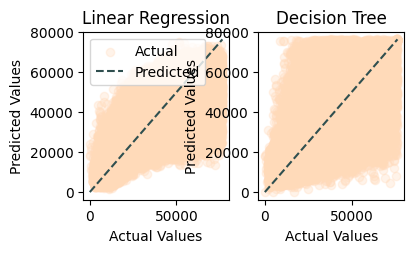

In [56]:
ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.scatter(Y_test, LR_y_predicted, color='#ffdab9', alpha=0.3, label='Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(Y_test, DT_predicted, color='#ffdab9', alpha=0.3)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='#2f4f4f')
plt.title('Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

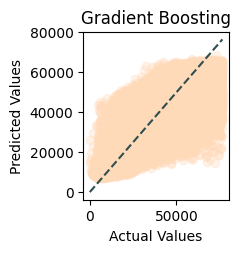

In [57]:
ax1 = plt.subplot2grid((2, 3), (1, 1))
plt.scatter(Y_test, GB_predicted, color='#ffdab9', alpha=0.3)  # alpha controls point transparency for better visualization
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--',color='#2f4f4f')
plt.title('Gradient Boosting')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()